##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## 2. Read in the hanford.csv file 

In [3]:
df = pd.read_csv('hanford.csv')
df

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5
5,HoodRiver,3.83,162.3
6,Portland,11.64,207.5
7,Columbia,6.41,177.9
8,Clatsop,8.34,210.3


## 3. Calculate the basic descriptive statistics on the data

In [4]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [7]:
iqr = df.quantile(q=0.75) - df.quantile(q=0.25)
iqr

Exposure      3.92
Mortality    47.80
dtype: float64

In [9]:
ual = df.quantile(q=0.75) + (iqr * 1.5)
ual

Exposure      12.29
Mortality    249.60
dtype: float64

In [10]:
lal = df.quantile(q=0.25) - (iqr * 1.5)
lal

Exposure     -3.39
Mortality    58.40
dtype: float64

## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [6]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


Yes, it seems very much so that there's a correlation worth to be investigated

## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [21]:
lm = smf.ols(formula="Mortality~Exposure",data=df).fit()
lm.params


Intercept    114.715631
Exposure       9.231456
dtype: float64

In [22]:
intercept, slope = lm.params

In [17]:
exposure_input = input("Type in an exposre you'd like to know the mortality for:")
if exposure_input:
    prediction = (float(lm.params['Exposure']) * float(exposure_input)) + (float(lm.params['Intercept']))
    print(prediction)

Type in an exposre you'd like to know the mortality for:4
151.6414559038395


## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

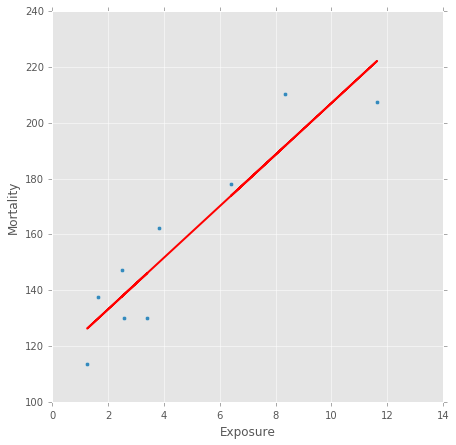

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
plt.style.use('ggplot')

ax = df.plot(ax = ax, kind= 'scatter', x = 'Exposure', y = 'Mortality')
plt.plot(df['Exposure'],slope*df['Exposure']+intercept, color="red", linewidth=2)

In [25]:
r = df.corr()['Exposure']['Mortality']
r

0.92634482071736912

In [27]:
coefficient_determination = r **2
coefficient_determination

0.85811472686989476

## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [30]:
prediction = (float(lm.params['Exposure']) * 10 + (float(lm.params['Intercept'])))
print(prediction)

207.03019352841983
